Deliverable 1

C:\Users\mkhub\AppData\Local\Temp\ipykernel_4300\3912269985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dept'] = label_encoder.fit_transform(X['Dept'])


Cluster assignments:
                   Name Dept  Cluster
0            John Smith   CS        2
1         Alice Johnson   CS        2
2         Michael Brown   EE        0
3           Emily Davis   EE        0
4          James Wilson   AI        3
...                 ...  ...      ...
2703       David Harris   CS        2
2704     Samantha Allen   CS        2
2705  Christopher Baker   EE        0
2706             Ismail   CS        2
2707            Daniyal   CS        2

[2708 rows x 3 columns]


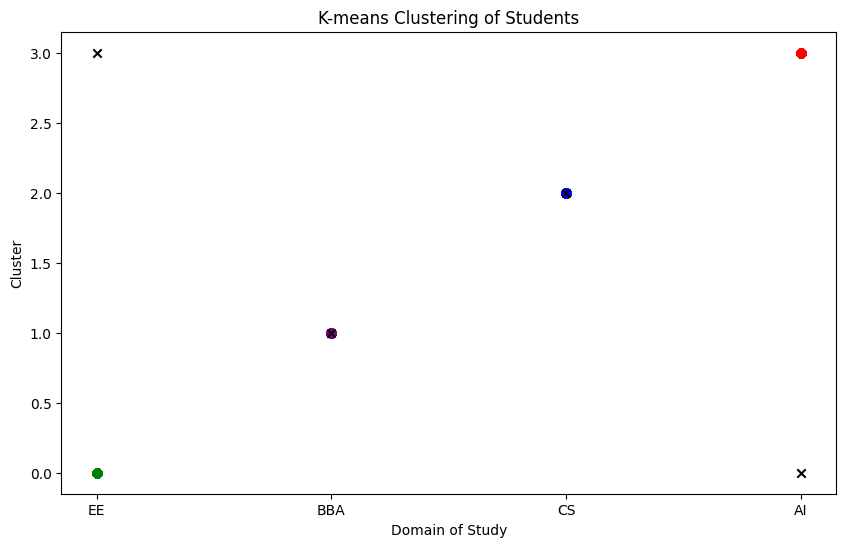

In [1]:
import csv
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Define the file path
file_path = 'Students.csv'

# Read the CSV file using pandas
data = pd.read_csv(file_path)

# Extract features (domains of study)
X = data[['Dept']]

# Encode categorical variables
label_encoder = LabelEncoder()
X['Dept'] = label_encoder.fit_transform(X['Dept'])

# Initialize K-means model
num_clusters = 4  # You can adjust this based on your data
kmeans = KMeans(n_clusters=num_clusters)

# Fit K-means model to the data
kmeans.fit(X)

# Get cluster labels for each student
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
data['Cluster'] = cluster_labels

# Print cluster assignments
print("Cluster assignments:")
print(data[['Name', 'Dept', 'Cluster']])

# Visualize the clustering (for 2D data)
# Define colors for each department
# Define colors for each department
colors = {'CS': 'blue', 'EE': 'green', 'AI': 'red', 'BBA': 'purple'}

# Visualize the clustering
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    for index, row in cluster_data.iterrows():
        plt.scatter(row['Dept'], cluster, color=colors[row['Dept']], label=row['Dept'] if cluster == 0 else "")
# Extract the values from the array of arrays
cluster_centers = [center[0] for center in kmeans.cluster_centers_]
plt.scatter(cluster_centers, range(num_clusters), marker='x', c='black', label='Centroids')
plt.xlabel('Domain of Study')
plt.ylabel('Cluster')
plt.title('K-means Clustering of Students')
#plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()



Deliverable 2

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Read the student data from the CSV file
def read_student_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Assign students to clusters based on clustering results
def assign_clusters(student_data, num_clusters):
    X = student_data[['Dept']]
    label_encoder = LabelEncoder()
    X['Dept_encoded'] = label_encoder.fit_transform(X['Dept'])
    
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X[['Dept_encoded']])
    
    student_data['Cluster'] = kmeans.labels_
    return student_data

# Generate an optimized seating plan for one time slot
def generate_seating_plan(student_data, room_capacities):
    seating_plan = {}
    student_count = len(student_data)
    total_capacity = sum(room_capacities)
    
    student_data = student_data.sort_values(by=['Dept']).reset_index(drop=True)
    
    seat_counter = 1
    
    for room, capacity in enumerate(room_capacities, start=1):
        room_students = student_data.head(min(capacity, len(student_data))).copy()
        room_students['Room'] = f'Room {room}'
        room_students['Seat'] = np.arange(seat_counter, seat_counter + len(room_students))
        seating_plan[f'Room {room}'] = room_students
        student_data = student_data.drop(room_students.index)
        seat_counter += len(room_students)
    
    return seating_plan

# Generate seating plans day-wise with two time slots per day
def generate_seating_plans(student_data, num_rooms, room_capacities):
    total_students = len(student_data)
    total_capacity = sum(room_capacities)
    
    if total_students <= total_capacity:
        return {"Day 1": {"Time Slot 1": generate_seating_plan(student_data, room_capacities)}}
    
    seating_plans = {}
    remaining_students = student_data.copy()
    day = 1
    slot = 1
    
    while total_students > 0:
        current_capacity = min(total_capacity, len(remaining_students))
        students_current_slot = remaining_students.head(current_capacity).copy()
        if f"Day {day}" not in seating_plans:
            seating_plans[f"Day {day}"] = {}
        seating_plans[f"Day {day}"][f"Time Slot {slot}"] = generate_seating_plan(students_current_slot, room_capacities)
        remaining_students = remaining_students.drop(students_current_slot.index)
        total_students -= len(students_current_slot)
        slot = 2 if slot == 1 else 1
        if slot == 1:
            day += 1
    
    return seating_plans

# Main program
def main():
    file_path = 'Students.csv'
    num_rooms = 30
    room_capacities = [30, 25, 35] * (num_rooms // len([30, 25, 35]))  # Repeat the capacities
    
    student_data = read_student_data(file_path)
    num_clusters = 4  # Adjust based on your clustering results
    student_data = assign_clusters(student_data, num_clusters)
    
    seating_plans = generate_seating_plans(student_data, num_rooms, room_capacities)
    
    for day, time_slots in seating_plans.items():
        print(f"{day}:")
        for time_slot, seating_plan in time_slots.items():
            print(f"  {time_slot}:")
            if not seating_plan:  # Check if seating_plan is empty
                print("    No seating plan generated for this time slot.")
                break
            for room, students in seating_plan.items():
                print(f"    {room} (Capacity: {room_capacities[int(room.split()[1]) - 1]}):")
                print(students[['Room', 'Seat', 'Name', 'ID', 'Dept', 'Batch']])
                print("\n")

main()






C:\Users\mkhub\AppData\Local\Temp\ipykernel_4300\1432611713.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dept_encoded'] = label_encoder.fit_transform(X['Dept'])


Day 1:
  Time Slot 1:
    Room 1 (Capacity: 30):
      Room  Seat               Name   ID Dept  Batch
0   Room 1     1    Alexander Scott  367   AI     21
1   Room 1     2  William Rodriguez  391   AI     20
2   Room 1     3    Alexander Scott  800   AI     21
3   Room 1     4    Charlotte Evans  801   AI     21
4   Room 1     5        Sarah Clark  384   AI     19
5   Room 1     6       James Wilson  383   AI     19
6   Room 1     7     Matthew Nelson  808   AI     22
7   Room 1     8     Grace Robinson  809   AI     22
8   Room 1     9     Grace Robinson  376   AI     22
9   Room 1    10     Matthew Nelson  375   AI     22
10  Room 1    11    Charlotte Evans  368   AI     21
11  Room 1    12       James Wilson  816   AI     19
12  Room 1    13        Sarah Clark  817   AI     19
13  Room 1    14       Sophia Lopez  360   AI     20
14  Room 1    15  William Rodriguez  359   AI     20
15  Room 1    16  William Rodriguez  824   AI     20
16  Room 1    17       Sophia Lopez  392   AI     

Deliverable 3

In [3]:
import pandas as pd
import numpy as np

# Read the teacher data from the CSV file
def read_teacher_data(file_path):
    return pd.read_csv(file_path)

# Assign faculty members to exam rooms based on department expertise and time slots
def assign_faculty_to_rooms(teacher_data, num_rooms, num_time_slots, num_days):
    teacher_count = len(teacher_data)
    if teacher_count == 0:
        print("Error: No teacher data available.")
        return {}
    
    # Shuffle the teacher data
    teacher_data = teacher_data.sample(frac=1).reset_index(drop=True)
    
    # Sort teacher data by department expertise
    teacher_data = teacher_data.sort_values(by='Dept')
    
    # Determine the number of teachers to assign per room per time slot per day
    teachers_per_slot = int(np.ceil(teacher_count / (num_rooms * num_time_slots * num_days)))
    
    # Split the teacher data into two halves for each time slot
    teacher_data_1, teacher_data_2 = np.array_split(teacher_data, 2)
    
    room_allocations = {}
    for day in range(1, num_days + 1):
        for slot in range(1, num_time_slots + 1):
            room_allocations[f"Day {day}, Slot {slot}"] = {}
            for room in range(1, num_rooms + 1):
                if slot == 1:
                    teachers = teacher_data_1.sample(teachers_per_slot).reset_index(drop=True)
                else:
                    teachers = teacher_data_2.sample(teachers_per_slot).reset_index(drop=True)
                room_allocations[f"Day {day}, Slot {slot}"][f'Room {room}'] = teachers
    
    return room_allocations

# Main program
def main():
    file_path = 'Teachers.csv'
    num_rooms = 30  # Number of exam rooms
    num_time_slots = 2  # Number of time slots in a day
    num_days = 2  # Number of days
    
    teacher_data = read_teacher_data(file_path)
    room_allocations = assign_faculty_to_rooms(teacher_data, num_rooms, num_time_slots, num_days)
    
    if room_allocations:
        # Output room allocations
        for day_slot, room_allocs in room_allocations.items():
            print(f"{day_slot}:")
            for room, teachers in room_allocs.items():
                print(f"  {room}:")
                print(teachers)
                print("\n")

main()


c:\Users\mkhub\Downloads\Q3_UnSupervised-Learning\UnSupervised-Learning\env\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Day 1, Slot 1:
  Room 1:
  Dept               Name
0   AI  William Rodriguez


  Room 2:
  Dept               Name
0   AI  William Rodriguez


  Room 3:
  Dept           Name
0  BBA  Daniel Turner


  Room 4:
  Dept   Name
0   CS  Ahmad


  Room 5:
  Dept               Name
0   AI  William Rodriguez


  Room 6:
  Dept    Name
0   CS  Ismail


  Room 7:
  Dept         Name
0  BBA  Emily Moore


  Room 8:
  Dept         Name
0   AI  Sarah Clark


  Room 9:
  Dept           Name
0   CS  Abigail Young


  Room 10:
  Dept            Name
0  BBA  David Martinez


  Room 11:
  Dept          Name
0   AI  Sophia Lopez


  Room 12:
  Dept           Name
0   CS  Alice Johnson


  Room 13:
  Dept           Name
0  BBA  Daniel Turner


  Room 14:
  Dept           Name
0  BBA  Matthew Perez


  Room 15:
  Dept           Name
0  BBA  Matthew Perez


  Room 16:
  Dept    Name
0   CS  Ismail


  Room 17:
  Dept               Name
0   AI  William Rodriguez


  Room 18:
  Dept           Name
0  BBA  Dani

UI

In [4]:
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import numpy as np
import tkinter as tk
from tkinter import ttk


# Read the teacher data from the CSV file
def read_teacher_data(file_path):
    return pd.read_csv(file_path)

# Assign faculty members to exam rooms based on department expertise and time slots
def assign_faculty_to_rooms(teacher_data, num_rooms, num_time_slots, num_days):
    teacher_count = len(teacher_data)
    if teacher_count == 0:
        print("Error: No teacher data available.")
        return {}
    
    # Shuffle the teacher data
    teacher_data = teacher_data.sample(frac=1).reset_index(drop=True)
    
    # Sort teacher data by department expertise
    teacher_data = teacher_data.sort_values(by='Dept')
    
    # Determine the number of teachers to assign per room per time slot per day
    teachers_per_slot = int(np.ceil(teacher_count / (num_rooms * num_time_slots * num_days)))
    
    # Split the teacher data into two halves for each time slot
    teacher_data_1, teacher_data_2 = np.array_split(teacher_data, 2)
    
    room_allocations = []
    for day in range(1, num_days + 1):
        for slot in range(1, num_time_slots + 1):
            for room in range(1, num_rooms + 1):
                if slot == 1:
                    teachers = teacher_data_1.sample(teachers_per_slot).reset_index(drop=True)
                else:
                    teachers = teacher_data_2.sample(teachers_per_slot).reset_index(drop=True)
                for index, teacher in teachers.iterrows():
                    room_allocations.append([day, slot, room, teacher['Dept'], teacher['Name']])
    
    return room_allocations

def load_Faculty_data(file_path):
    # Read data from CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    return df

def display_Faculty_in_grid(root, data):
    # Create a scrollable frame
    canvas = tk.Canvas(root)
    canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

    scrollbar = ttk.Scrollbar(root, orient=tk.VERTICAL, command=canvas.yview)
    scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

    canvas.configure(yscrollcommand=scrollbar.set)

    frame = tk.Frame(canvas)
    canvas.create_window((0, 0), window=frame, anchor="nw")

    # Display data in a Treeview widget
    columns = ['day','time slot','room no','dept','name']
    tree = ttk.Treeview(frame, columns=columns, show="headings", height=30)
    tree.pack(fill="both", expand=True)

    # Add column headings and set column width
    column_widths = [100, 100, 100, 100, 200]  # Adjust column widths as needed
    for col, width in zip(columns, column_widths):
        tree.heading(col, text=col)
        tree.column(col, width=width)

    # Add data rows
    for index, row in data.iterrows():
        values = [row[col] for col in columns]
        tree.insert("", "end", values=values)

    # Update scroll region
    frame.update_idletasks()
    canvas.config(scrollregion=canvas.bbox("all"))


def load_data(file_path):
    # Read data from CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    return df

def display_data_in_grid(root, data):
    # Create a scrollable frame
    canvas = tk.Canvas(root)
    canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

    scrollbar = ttk.Scrollbar(root, orient=tk.VERTICAL, command=canvas.yview)
    scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

    canvas.configure(yscrollcommand=scrollbar.set)

    frame = tk.Frame(canvas)
    canvas.create_window((0, 0), window=frame, anchor="nw")

    # Display data in a Treeview widget
    columns = ['Batch', 'Dept', 'Name', 'ID', 'Cluster', 'Room', 'Seat', 'Day', 'Time Slot', 'Room Capacity']
    tree = ttk.Treeview(frame, columns=columns, show="headings", height=30)
    tree.pack(fill="both", expand=True)

    # Add column headings and set column width
    column_widths = [100, 100, 200, 50, 50, 100, 50, 50, 100, 100]  # Adjust column widths as needed
    for col, width in zip(columns, column_widths):
        tree.heading(col, text=col)
        tree.column(col, width=width)

    # Add data rows
    for index, row in data.iterrows():
        values = [row[col] for col in columns]
        tree.insert("", "end", values=values)

    # Update scroll region
    frame.update_idletasks()
    canvas.config(scrollregion=canvas.bbox("all"))

# Read the student data from the CSV file
def read_student_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Assign students to clusters based on clustering results
def assign_clusters(student_data, num_clusters):
    X = student_data[['Dept']]
    label_encoder = LabelEncoder()
    X['Dept_encoded'] = label_encoder.fit_transform(X['Dept'])
    
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X[['Dept_encoded']])
    
    student_data['Cluster'] = kmeans.labels_
    return student_data

def generate_seating_plan(student_data, room_capacities):
    seating_plan = {}
    student_count = len(student_data)
    total_capacity = sum(room_capacities)
    
    student_data = student_data.sort_values(by=['Dept']).reset_index(drop=True)
    
    seat_counter = 1
    
    for room, capacity in enumerate(room_capacities, start=1):
        room_students = student_data.head(min(capacity, len(student_data))).copy()
        room_students['Room'] = f'Room {room}'
        room_students['Seat'] = np.arange(seat_counter, seat_counter + len(room_students))
        seating_plan[f'Room {room}'] = room_students
        student_data = student_data.drop(room_students.index)
        seat_counter += len(room_students)
    
    return seating_plan

# Generate seating plans day-wise with two time slots per day
def generate_seating_plans(student_data, num_rooms, room_capacities):
    total_students = len(student_data)
    total_capacity = sum(room_capacities)
    
    if total_students <= total_capacity:
        return {"Day 1": {"Time Slot 1": generate_seating_plan(student_data, room_capacities)}}
    
    seating_plans = []
    remaining_students = student_data.copy()
    day = 1
    slot = 1
    
    while total_students > 0:
        current_capacity = min(total_capacity, len(remaining_students))
        students_current_slot = remaining_students.head(current_capacity).copy()
        seating_plan = generate_seating_plan(students_current_slot, room_capacities)
        for room, students in seating_plan.items():
            room_capacity = room_capacities[int(room.split()[1]) - 1]
            df = students.copy()
            df['Day'] = f'Day {day}'
            df['Time Slot'] = f'Time Slot {slot}'
            df['Room Capacity'] = room_capacity
            seating_plans.append(df)
        remaining_students = remaining_students.drop(students_current_slot.index)
        total_students -= len(students_current_slot)
        slot = 2 if slot == 1 else 1
        if slot == 1:
            day += 1
    
    return pd.concat(seating_plans, ignore_index=True)


# Function to create student input window
def create_student_window():
    student_window = tk.Toplevel()
    student_window.title("Add Student")

    # Input fields
    tk.Label(student_window, text="Name:").grid(row=0, column=0, padx=10, pady=5)
    name_entry = tk.Entry(student_window)
    name_entry.grid(row=0, column=1, padx=10, pady=5)

    tk.Label(student_window, text="ID:").grid(row=1, column=0, padx=10, pady=5)
    id_entry = tk.Entry(student_window)
    id_entry.grid(row=1, column=1, padx=10, pady=5)

    tk.Label(student_window, text="Batch:").grid(row=2, column=0, padx=10, pady=5)
    batch_entry = tk.Entry(student_window)
    batch_entry.grid(row=2, column=1, padx=10, pady=5)

    tk.Label(student_window, text="Department:").grid(row=3, column=0, padx=10, pady=5)
    department_entry = tk.Entry(student_window)
    department_entry.grid(row=3, column=1, padx=10, pady=5)

    # Submit button
    submit_btn = tk.Button(student_window, text="Submit", command=lambda: save_student_data(name_entry.get(), id_entry.get(), batch_entry.get(), department_entry.get()))
    submit_btn.grid(row=4, columnspan=2, pady=10)

# Function to create faculty input window
def create_faculty_window():
    faculty_window = tk.Toplevel()
    faculty_window.title("Add Faculty")

    # Input fields
    tk.Label(faculty_window, text="Name:").grid(row=0, column=0, padx=10, pady=5)
    name_entry = tk.Entry(faculty_window)
    name_entry.grid(row=0, column=1, padx=10, pady=5)

    tk.Label(faculty_window, text="Department:").grid(row=1, column=0, padx=10, pady=5)
    department_entry = tk.Entry(faculty_window)
    department_entry.grid(row=1, column=1, padx=10, pady=5)

    # Submit button
    submit_btn = tk.Button(faculty_window, text="Submit", command=lambda: save_faculty_data(name_entry.get(), department_entry.get()))
    submit_btn.grid(row=2, columnspan=2, pady=10)

# Function to save student data to CSV file
def save_student_data(name, id, batch, department):
    try:
        # Check if ID already exists
        df = pd.read_csv('Students.csv')
        if str(id) in df['ID'].astype(str).values:
            messagebox.showerror("Error", "ID already exists. Please choose a different ID.")
            return
        
        # Prepare data and save to CSV
        data = {'Batch': [batch], 'Department': [department], 'Name': [name], 'ID': [id]}
        df = pd.DataFrame(data)
        df.to_csv('Students.csv', mode='a', index=False, header=False)  # Append mode with no header
        messagebox.showinfo("Success", "Student data saved successfully.")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")

# Function to save faculty data to CSV file
def save_faculty_data(name, department):
    try:
        data = {'Dept': [department], 'Name' :[name]}
        df = pd.DataFrame(data)
        df.to_csv('Teachers.csv', mode='a', index=False, header=False)  # Append mode with header if file does not exist
        messagebox.showinfo("Success", "Faculty data saved successfully.")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")

# Function to view seating plan
def view_seating_plan():
    # Your code to view seating plan here
    file_path = 'Students.csv'
    num_rooms = 30
    room_capacities = [30, 25, 35] * (num_rooms // len([30, 25, 35]))  # Repeat the capacities
    
    student_data = read_student_data(file_path)
    num_clusters = 4  # Adjust based on your clustering results
    student_data = assign_clusters(student_data, num_clusters)
    
    seating_plans = generate_seating_plans(student_data, num_rooms, room_capacities)
    
    seating_plans.to_csv('seatingplan.csv', index=False)
    file_path = "seatingplan.csv"  # Change this to the path of your CSV file
    data = load_data(file_path)

    root1 = tk.Tk()
    root1.title("Data Grid")

    display_data_in_grid(root1, data)

    root1.mainloop()
    
# Function to view faculty assignments
def view_faculty_assignments():
    # Your code to view faculty assignments here
    file_path = 'Teachers.csv'
    num_rooms = 30  # Number of exam rooms
    num_time_slots = 2  # Number of time slots in a day
    num_days = 2  # Number of days
    
    teacher_data = load_Faculty_data(file_path)
    room_allocations = assign_faculty_to_rooms(teacher_data, num_rooms, num_time_slots, num_days)
    
    if room_allocations:
        # Output room allocations
        for allocation in room_allocations:
            print(allocation)
        
        # Save the room allocations to a CSV file
        df = pd.DataFrame(room_allocations, columns=['Day', 'Time Slot', 'Room', 'Dept', 'name'])
        df.to_csv('facultyassign.csv', index=False)
    file_path = "facultyassign.csv"  # Change this to the path of your CSV file
    data = load_data(file_path)

    root2 = tk.Tk()
    root2.title("Faculty ALLocation")

    display_Faculty_in_grid(root2, data)
    #messagebox.showinfo("View Faculty Assignments", "View Faculty Assignments button clicked.")
def Genrate_Report():
    seating_plan = pd.read_csv('seatingplan.csv')
    faculty_assign = pd.read_csv('facultyassign.csv')

    # Convert 'Room' column to string type in both DataFrames
    seating_plan['Room'] = seating_plan['Room'].astype(str)
    faculty_assign['Room'] = faculty_assign['Room'].astype(str)
    seating_plan['Time Slot'] = seating_plan['Time Slot'].astype(str)
    faculty_assign['Time Slot'] = faculty_assign['Time Slot'].astype(str)
    seating_plan['Day'] = seating_plan['Day'].astype(str)
    faculty_assign['Day'] = faculty_assign['Day'].astype(str)

    # Merge data based on room number, time slot, and day

# Merge dataframes on common columns
    report = pd.merge(seating_plan, faculty_assign, on=['Room', 'Time Slot', 'Dept', 'Day'], how='inner')

# Select relevant columns for the report
    report = report[['Room', 'Time Slot', 'Day', 'Name', 'ID', 'Name']]

# Rename columns for clarity
    report.columns = ['Room', 'Time Slot', 'Day', 'Student Name', 'Student ID', 'Teacher Name']

# Save report to a new CSV file
    report.to_csv('exam_report.csv', index=False)

# Display the report
    print("Exam Report:")
    print(report)
    
# Main function
def main():
    root = tk.Tk()
    root.title("Exam Management System")

    # Buttons to input student and faculty data
    tk.Button(root, text="Add Student", command=create_student_window).pack(pady=10)
    tk.Button(root, text="Add Faculty", command=create_faculty_window).pack(pady=10)
    
    tk.Button(root, text="Genrate Report", command=Genrate_Report).pack(pady=10)
    
    # Buttons to view seating plan and faculty assignments
    tk.Button(root, text="View Seating Plan", command=view_seating_plan).pack(pady=10)
    tk.Button(root, text="View Faculty Assignments", command=view_faculty_assignments).pack(pady=10)

    root.mainloop()

main()


C:\Users\mkhub\AppData\Local\Temp\ipykernel_4300\1670892734.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dept_encoded'] = label_encoder.fit_transform(X['Dept'])
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\mkhub\Downloads\Q3_UnSupervised-Learning\UnSupervised-Learning\env\Lib\site-packages\pandas\core\indexes\base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\\

[1, 1, 1, 'AI', 'Charlotte Evans']
[1, 1, 2, 'BBA', 'David Martinez']
[1, 1, 3, 'AI', 'Alexander Scott']
[1, 1, 4, 'AI', 'Matthew Nelson']
[1, 1, 5, 'AI', 'Sophia Lopez']
[1, 1, 6, 'CS', 'Joseph Carter']
[1, 1, 7, 'CS', 'Emily Davis']
[1, 1, 8, 'AI', 'William Rodriguez']
[1, 1, 9, 'CS', 'Samantha Allen']
[1, 1, 10, 'CS', 'Emily Davis']
[1, 1, 11, 'CS', 'Emily Davis']
[1, 1, 12, 'AI', 'Matthew Nelson']
[1, 1, 13, 'BBA', 'Isabella Green']
[1, 1, 14, 'CS', 'Emily Davis']
[1, 1, 15, 'AI', 'Sophia Lopez']
[1, 1, 16, 'BBA', 'David Martinez']
[1, 1, 17, 'AI', 'Matthew Nelson']
[1, 1, 18, 'AI', 'Charlotte Evans']
[1, 1, 19, 'AI', 'Sophia Lopez']
[1, 1, 20, 'BBA', 'Emily Moore']
[1, 1, 21, 'AI', 'Matthew Nelson']
[1, 1, 22, 'BBA', 'David Martinez']
[1, 1, 23, 'BBA', 'Daniel Turner']
[1, 1, 24, 'BBA', 'Matthew Perez']
[1, 1, 25, 'BBA', 'Matthew Perez']
[1, 1, 26, 'AI', 'Sarah Clark']
[1, 1, 27, 'BBA', 'Matthew Perez']
[1, 1, 28, 'BBA', 'David Martinez']
[1, 1, 29, 'CS', 'Samantha Allen']
[1, 1, 

c:\Users\mkhub\Downloads\Q3_UnSupervised-Learning\UnSupervised-Learning\env\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


[1, 1, 1, 'AI', 'Sarah Clark']
[1, 1, 2, 'BBA', 'Daniel Turner']
[1, 1, 3, 'CS', 'Michael Brown']
[1, 1, 4, 'CS', 'Joseph Carter']
[1, 1, 5, 'BBA', 'Isabella Green']
[1, 1, 6, 'CS', 'Joseph Carter']
[1, 1, 7, 'AI', 'Sarah Clark']
[1, 1, 8, 'BBA', 'David Martinez']
[1, 1, 9, 'BBA', 'Isabella Green']
[1, 1, 10, 'BBA', 'Emily Moore']
[1, 1, 11, 'AI', 'William Rodriguez']
[1, 1, 12, 'CS', 'Michael Brown']
[1, 1, 13, 'AI', 'Sarah Clark']
[1, 1, 14, 'AI', 'Charlotte Evans']
[1, 1, 15, 'BBA', 'Matthew Perez']
[1, 1, 16, 'AI', 'Sarah Clark']
[1, 1, 17, 'BBA', 'Matthew Perez']
[1, 1, 18, 'CS', 'Ahmad']
[1, 1, 19, 'CS', 'Michael Brown']
[1, 1, 20, 'AI', 'William Rodriguez']
[1, 1, 21, 'BBA', 'Isabella Green']
[1, 1, 22, 'BBA', 'Matthew Perez']
[1, 1, 23, 'BBA', 'Isabella Green']
[1, 1, 24, 'CS', 'Michael Brown']
[1, 1, 25, 'BBA', 'Emily Moore']
[1, 1, 26, 'CS', 'Ahmad']
[1, 1, 27, 'AI', 'Alexander Scott']
[1, 1, 28, 'BBA', 'Matthew Perez']
[1, 1, 29, 'AI', 'Charlotte Evans']
[1, 1, 30, 'AI', 'Sa

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\mkhub\Downloads\Q3_UnSupervised-Learning\UnSupervised-Learning\env\Lib\site-packages\pandas\core\indexes\base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'day'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\mkhub\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\mkhub\AppD